## 1. Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load Dataset

In [42]:
# Load data
df = pd.read_csv('../data/processed/youtube_combined_data.csv')

# Display basic info
print(f'Dataset Shape: {df.shape}')
print(f'Total Records: {df.shape[0]:,}')
print(f'Total Features: {df.shape[1]}')

Dataset Shape: (50160, 16)
Total Records: 50,160
Total Features: 16


In [19]:
# First few rows
df.head()

,video_id,title,topic,category_id,published_at,duration_seconds,video_definition,captions_flag,channel_id,channel_title,subscriber_count,total_videos,channel_age_days,views,likes,comments
0,0BkEej0H1VU,*SMALL* Apartment Makeover w/ Surprise REVEAL!...,Hobby,22,2025-05-15T20:50:21Z,1493,hd,False,UCtwzsvzRCfPddq2gPlgKW1w,Lone Fox,1770000,485,2810,312359,19516,949
1,nL6DN0CWRWI,transforming my apartment 🏡🌷 i got a new couch...,Hobby,26,2024-05-26T17:00:34Z,1508,hd,False,UCFGQGLGZU1TgX-PhawwxjJg,annika's leaf,1070000,308,3314,353355,14823,727
2,gAgAYyo1O0o,Scandi-Style Studio Apartment Makeover With Po...,Hobby,26,2025-10-25T15:01:20Z,1798,hd,True,UCrh9tOpAY2-Ev5pRssXq2Wg,Alexandra Gater,888000,422,4020,350306,26864,1018
3,3EJu45Tkbyc,*196 sq ft* Organic Modern Studio Apartment Ma...,Hobby,26,2025-09-20T15:00:07Z,1821,hd,True,UCrh9tOpAY2-Ev5pRssXq2Wg,Alexandra Gater,888000,422,4020,458367,33976,1458
4,cShkxcg_la0,Small APARTMENT MAKEOVER 2024 :: Budget AirBnB...,Hobby,26,2024-03-18T17:00:31Z,2203,hd,False,UCbQj1aJiioDM8g0tmGmtC_w,This Crazy Life,457000,787,3009,490393,17309,1610


## 3. Dataset Overview

In [20]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50160 entries, 0 to 50159
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   video_id          50160 non-null  object
 1   title             50160 non-null  object
 2   topic             50160 non-null  object
 3   category_id       50160 non-null  int64 
 4   published_at      50160 non-null  object
 5   duration_seconds  50160 non-null  int64 
 6   video_definition  50160 non-null  object
 7   captions_flag     50160 non-null  bool  
 8   channel_id        50160 non-null  object
 9   channel_title     50160 non-null  object
 10  subscriber_count  50160 non-null  int64 
 11  total_videos      50160 non-null  int64 
 12  channel_age_days  50160 non-null  int64 
 13  views             50160 non-null  int64 
 14  likes             50160 non-null  int64 
 15  comments          50160 non-null  int64 
dtypes: bool(1), int64(8), object(7)
memory usage: 5.8+ MB


In [45]:
# Statistical summary
df.describe()

,category_id,duration_seconds,subscriber_count,total_videos,channel_age_days,views,likes,comments
count,50160.000000,50160.000000,5.016000e+04,50160.000000,50160.000000,5.016000e+04,5.016000e+04,50160.000000
mean,22.571531,2422.810825,2.977674e+06,5172.923405,3236.794597,2.709607e+06,3.010090e+04,1119.361643
std,6.164992,6201.971156,1.061033e+07,28809.301109,1826.909349,3.278482e+07,1.861561e+05,6548.073127
min,1.000000,240.000000,0.000000e+00,1.000000,3.000000,1.000000e+03,0.000000e+00,0.000000
25%,22.000000,630.000000,5.350000e+04,213.000000,1809.000000,2.033125e+04,4.250000e+02,29.000000
50%,24.000000,1199.000000,3.230000e+05,565.000000,3121.000000,1.385370e+05,2.630000e+03,141.000000
75%,27.000000,1990.000000,1.580000e+06,1505.000000,4581.000000,8.132555e+05,1.387225e+04,596.000000
max,29.000000,367231.000000,4.500000e+08,643411.000000,7446.000000,3.580474e+09,1.299725e+07,550394.000000


## 4. Data Quality Check

In [47]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df

,Missing_Count,Percentage
video_id,0,0.0
title,0,0.0
topic,0,0.0
category_id,0,0.0
published_at,0,0.0
duration_seconds,0,0.0
video_definition,0,0.0
captions_flag,0,0.0
channel_id,0,0.0
channel_title,0,0.0


In [23]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f'Duplicate Rows: {duplicates}')
if duplicates > 0:
    print(f'Percentage: {(duplicates/len(df))*100:.2f}%')

Duplicate Rows: 90
Percentage: 0.18%


## 5. Target Variable Analysis

In [48]:
# Create target variable
df['engagement_score'] = (
    np.log1p(df['likes']) + np.log1p(df['comments'])
) / np.log1p(df['views'])

In [49]:
# Define target column
target_col = 'engagement_score'

# Target statistics
print(f'Target Variable: {target_col}')
print('\nStatistics:')
print(df[target_col].describe())
print(f'\nSkewness: {df[target_col].skew():.3f}')
print(f'Kurtosis: {df[target_col].kurtosis():.3f}')

Target Variable: engagement_score

Statistics:
count    50160.000000
mean         1.037383
std          0.243239
min          0.000000
25%          0.929434
50%          1.098434
75%          1.207597
max          1.683892
Name: engagement_score, dtype: float64

Skewness: -1.208
Kurtosis: 1.467


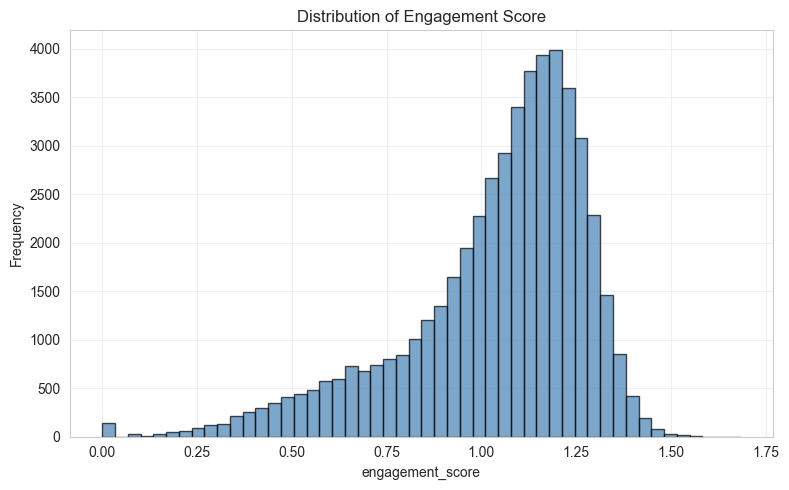

In [51]:
# Target distribution - Histogram
plt.figure(figsize=(8, 5))
plt.hist(df[target_col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel(target_col)
plt.ylabel('Frequency')
plt.title('Distribution of Engagement Score')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Numerical Features Analysis

In [54]:
# Get numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f'Numerical Features ({len(numeric_cols)}): {numeric_cols}')

Numerical Features (9): ['category_id', 'duration_seconds', 'subscriber_count', 'total_videos', 'channel_age_days', 'views', 'likes', 'comments', 'engagement_score']


In [53]:
# Statistical summary
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,50160.0,2.257153e+01,6.164992e+00,1.0,22.000000,24.000000,2.700000e+01,2.900000e+01
duration_seconds,50160.0,2.422811e+03,6.201971e+03,240.0,630.000000,1199.000000,1.990000e+03,3.672310e+05
subscriber_count,50160.0,2.977674e+06,1.061033e+07,0.0,53500.000000,323000.000000,1.580000e+06,4.500000e+08
total_videos,50160.0,5.172923e+03,2.880930e+04,1.0,213.000000,565.000000,1.505000e+03,6.434110e+05
channel_age_days,50160.0,3.236795e+03,1.826909e+03,3.0,1809.000000,3121.000000,4.581000e+03,7.446000e+03
views,50160.0,2.709607e+06,3.278482e+07,1000.0,20331.250000,138537.000000,8.132555e+05,3.580474e+09
likes,50160.0,3.010090e+04,1.861561e+05,0.0,425.000000,2630.000000,1.387225e+04,1.299725e+07
comments,50160.0,1.119362e+03,6.548073e+03,0.0,29.000000,141.000000,5.960000e+02,5.503940e+05
engagement_score,50160.0,1.037383e+00,2.432385e-01,0.0,0.929434,1.098434,1.207597e+00,1.683892e+00


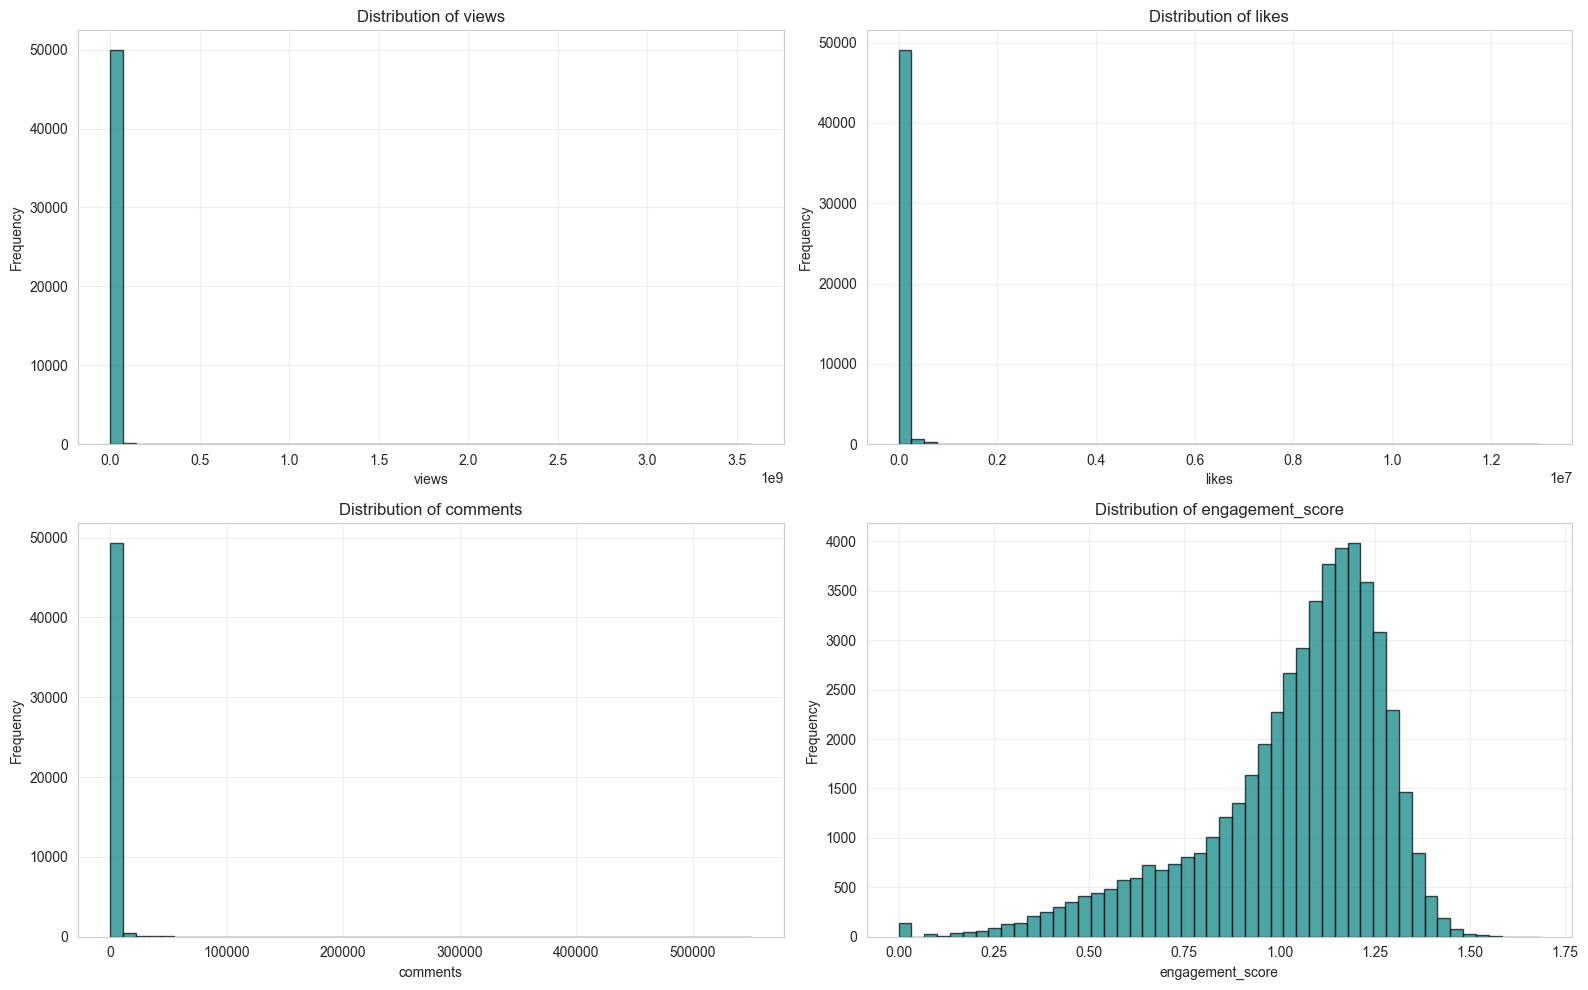

In [29]:
# Distribution of key numerical features
key_features = ['views', 'likes', 'comments', 'engagement_score']
n_features = len(key_features)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if col in df.columns:
        axes[idx].hist(df[col], bins=50, color='teal', edgecolor='black', alpha=0.7)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

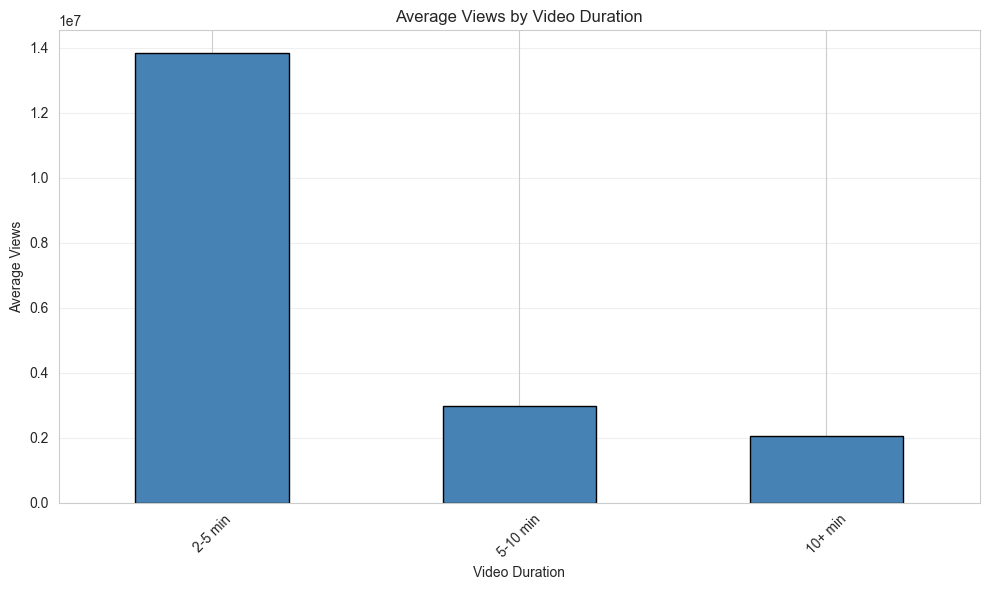

In [73]:
# Create duration bins and analyze views by duration
duration_bins = [0, 120, 300, 600, float('inf')]
duration_labels = ['0-2 min', '2-5 min', '5-10 min', '10+ min']

df['duration_bin'] = pd.cut(df['duration_seconds'], bins=duration_bins, labels=duration_labels, right=False)

# Calculate average views by duration bin
avg_views_by_duration = df.groupby('duration_bin', observed=True)['views'].mean()

# Visualization
plt.figure(figsize=(10, 6))
avg_views_by_duration.plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Video Duration')
plt.ylabel('Average Views')
plt.title('Average Views by Video Duration')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Categorical Features Analysis

In [61]:
# Get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical Features ({len(cat_cols)}): {cat_cols}')

Categorical Features (7): ['video_id', 'title', 'topic', 'published_at', 'video_definition', 'channel_id', 'channel_title']


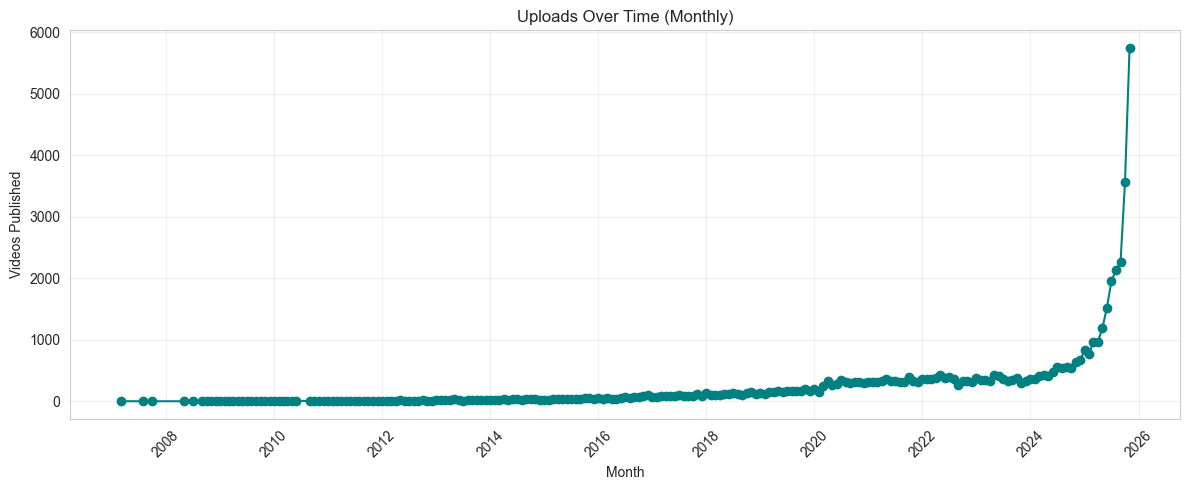

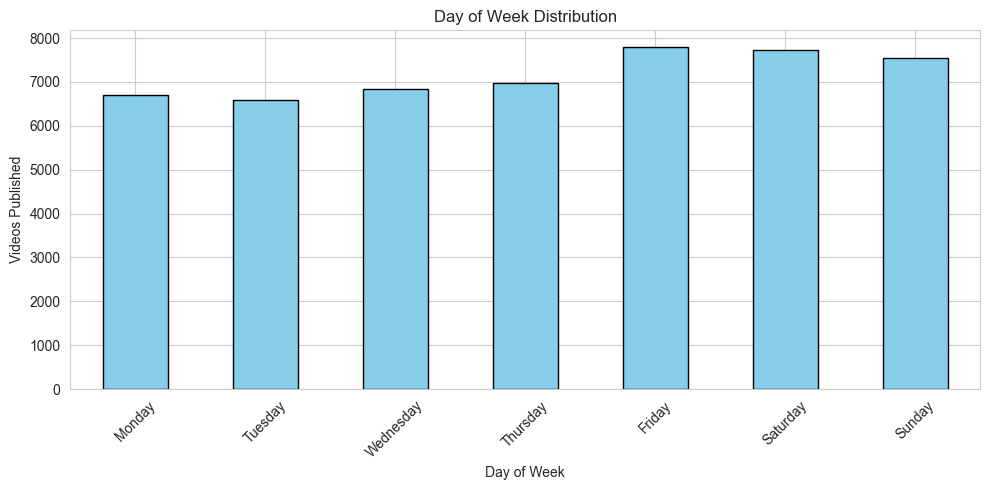

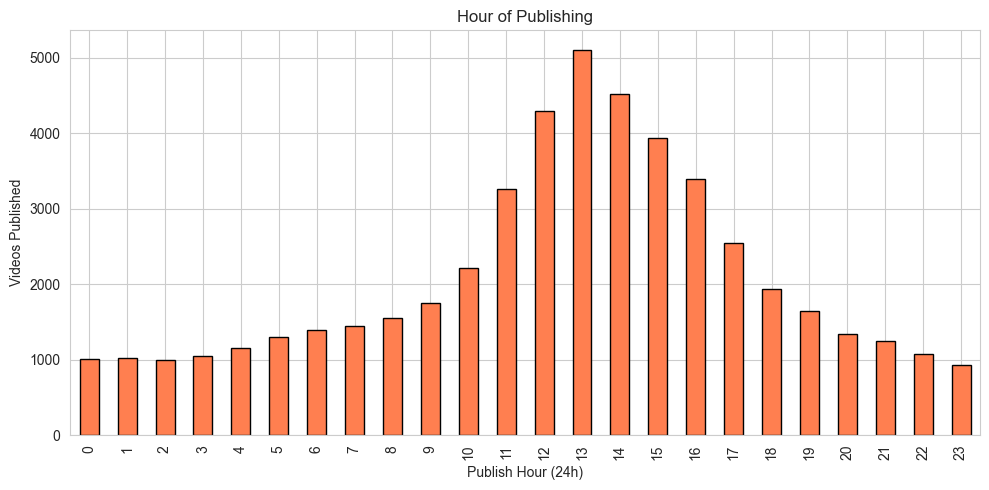

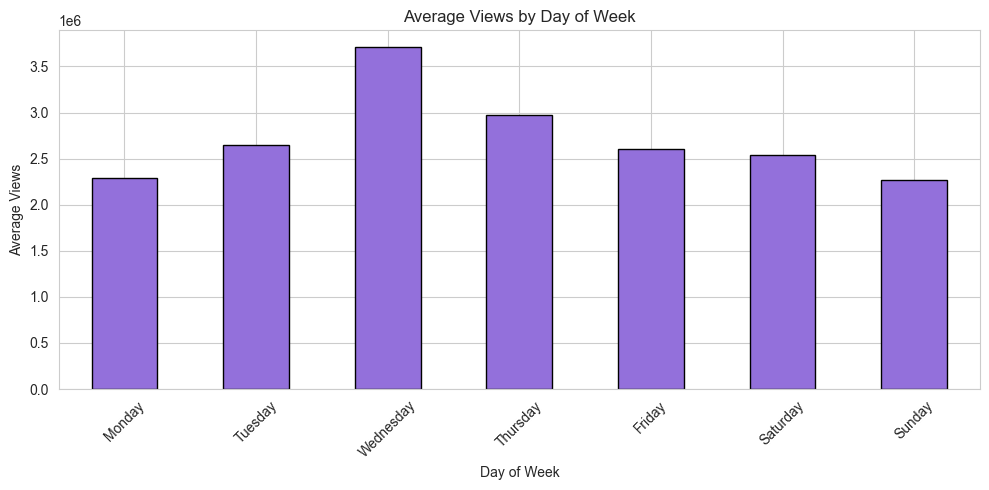

In [67]:
df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
df['publish_year'] = df['published_at'].dt.year
df['publish_month'] = df['published_at'].dt.to_period('M').dt.to_timestamp()
df['publish_day_of_week'] = df['published_at'].dt.day_name()
df['publish_hour'] = df['published_at'].dt.hour

# Monthly upload trend
monthly_counts = df['publish_month'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', color='teal')
plt.xlabel('Month')
plt.ylabel('Videos Published')
plt.title('Uploads Over Time (Monthly)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Day of week distribution
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['publish_day_of_week'].value_counts().reindex(dow_order)
plt.figure(figsize=(10, 5))
dow_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Videos Published')
plt.title('Day of Week Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hour of publishing distribution
hour_counts = df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
hour_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Publish Hour (24h)')
plt.ylabel('Videos Published')
plt.title('Hour of Publishing')
plt.tight_layout()
plt.show()

# Timing vs performance: avg views by day of week
avg_views_dow = df.groupby('publish_day_of_week')['views'].mean().reindex(dow_order)
plt.figure(figsize=(10, 5))
avg_views_dow.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Average Views')
plt.title('Average Views by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


topic:
Unique values: 52

Top 10 values:
topic
Lifestyle (sociology)    10500
Hobby                     8856
Knowledge                 6799
Food                      4042
Entertainment             3966
Health                    2970
Unknown                   2355
Technology                2190
Society                   2141
Fashion                   1152
Name: count, dtype: int64


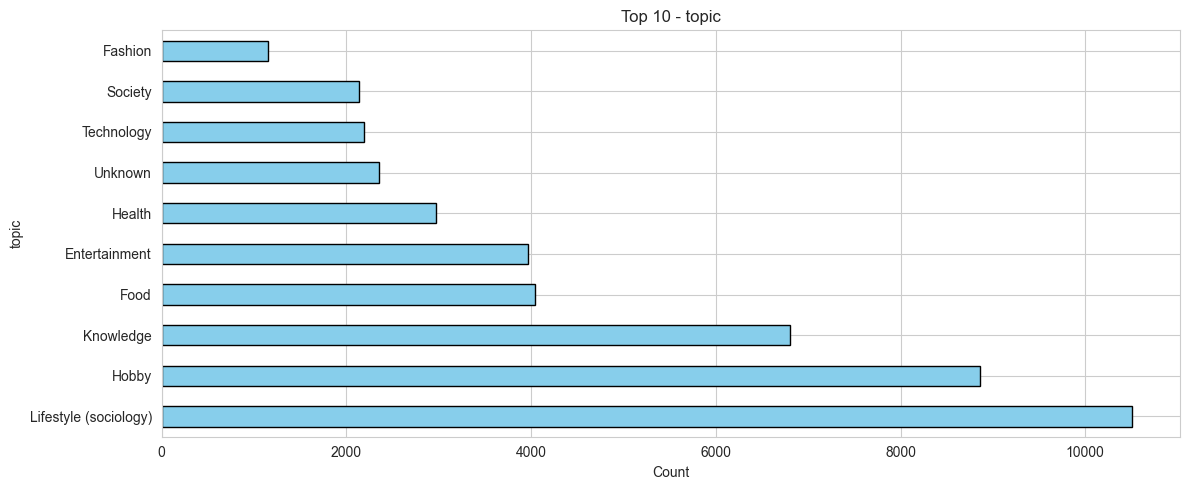

In [70]:
# Show counts for topic
for col in ['topic']:
    print(f'\n{col}:')
    print(f'Unique values: {df[col].nunique()}')
    print()
    
    top_counts = df[col].value_counts().head(10)
    print('Top 10 values:')
    print(top_counts)
    
    plt.figure(figsize=(12, 5))
    top_counts.plot(kind='barh', color='skyblue', edgecolor='black')
    plt.xlabel('Count')
    plt.title(f'Top 10 - {col}')
    plt.tight_layout()
    plt.show()

## 8. Correlation Analysis

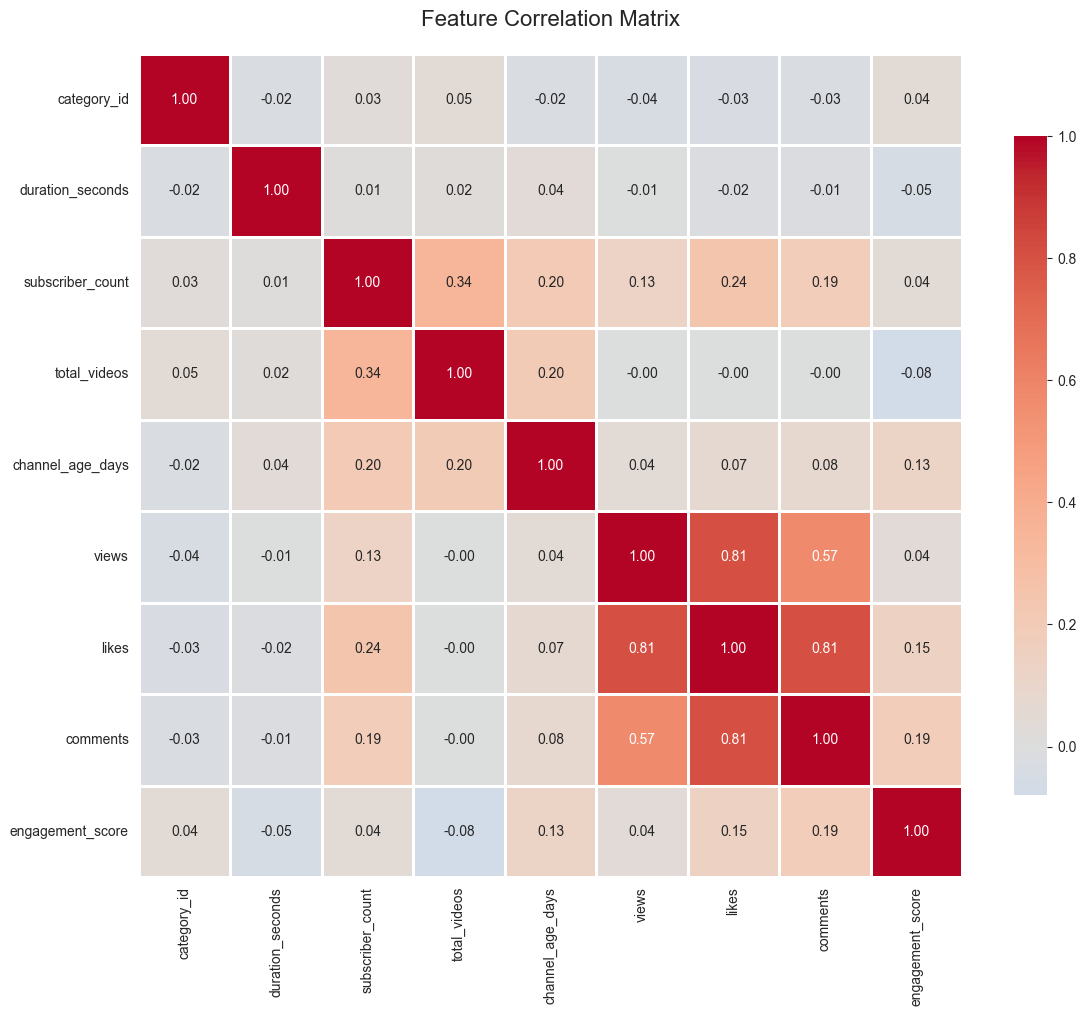

In [32]:
# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

Correlations with engagement_score:
engagement_score    1.000000
comments            0.188913
likes               0.145002
channel_age_days    0.126610
subscriber_count    0.043844
category_id         0.043504
views               0.036576
duration_seconds   -0.048474
total_videos       -0.079278
Name: engagement_score, dtype: float64


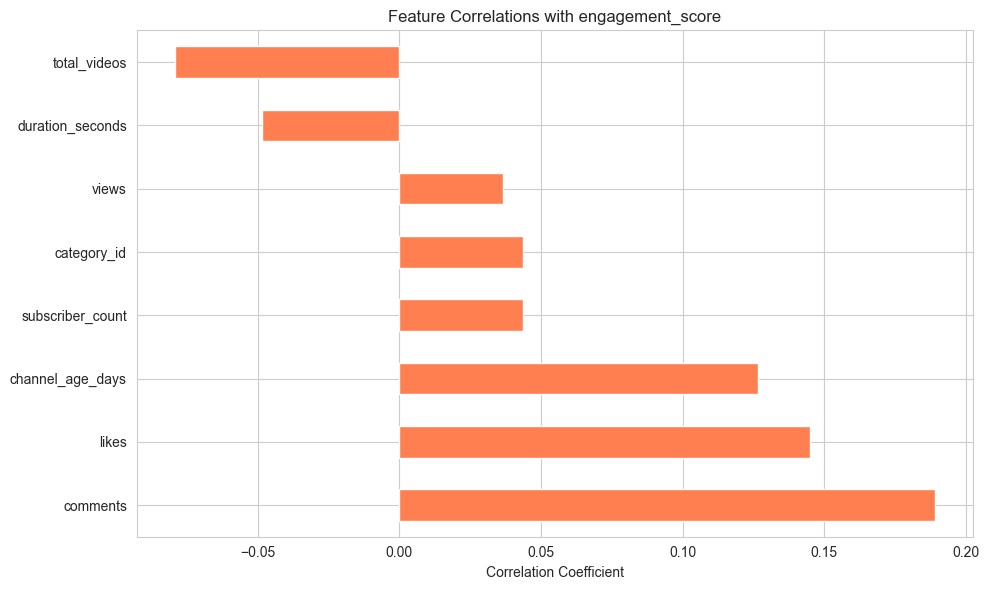

In [33]:
# Top correlations with target
if target_col in correlation.columns:
    target_corr = correlation[target_col].sort_values(ascending=False)
    print(f'Correlations with {target_col}:')
    print(target_corr)
    
    # Plot
    plt.figure(figsize=(10, 6))
    target_corr[1:].plot(kind='barh', color='coral')
    plt.xlabel('Correlation Coefficient')
    plt.title(f'Feature Correlations with {target_col}')
    plt.tight_layout()
    plt.show()

## 9. Feature Relationships

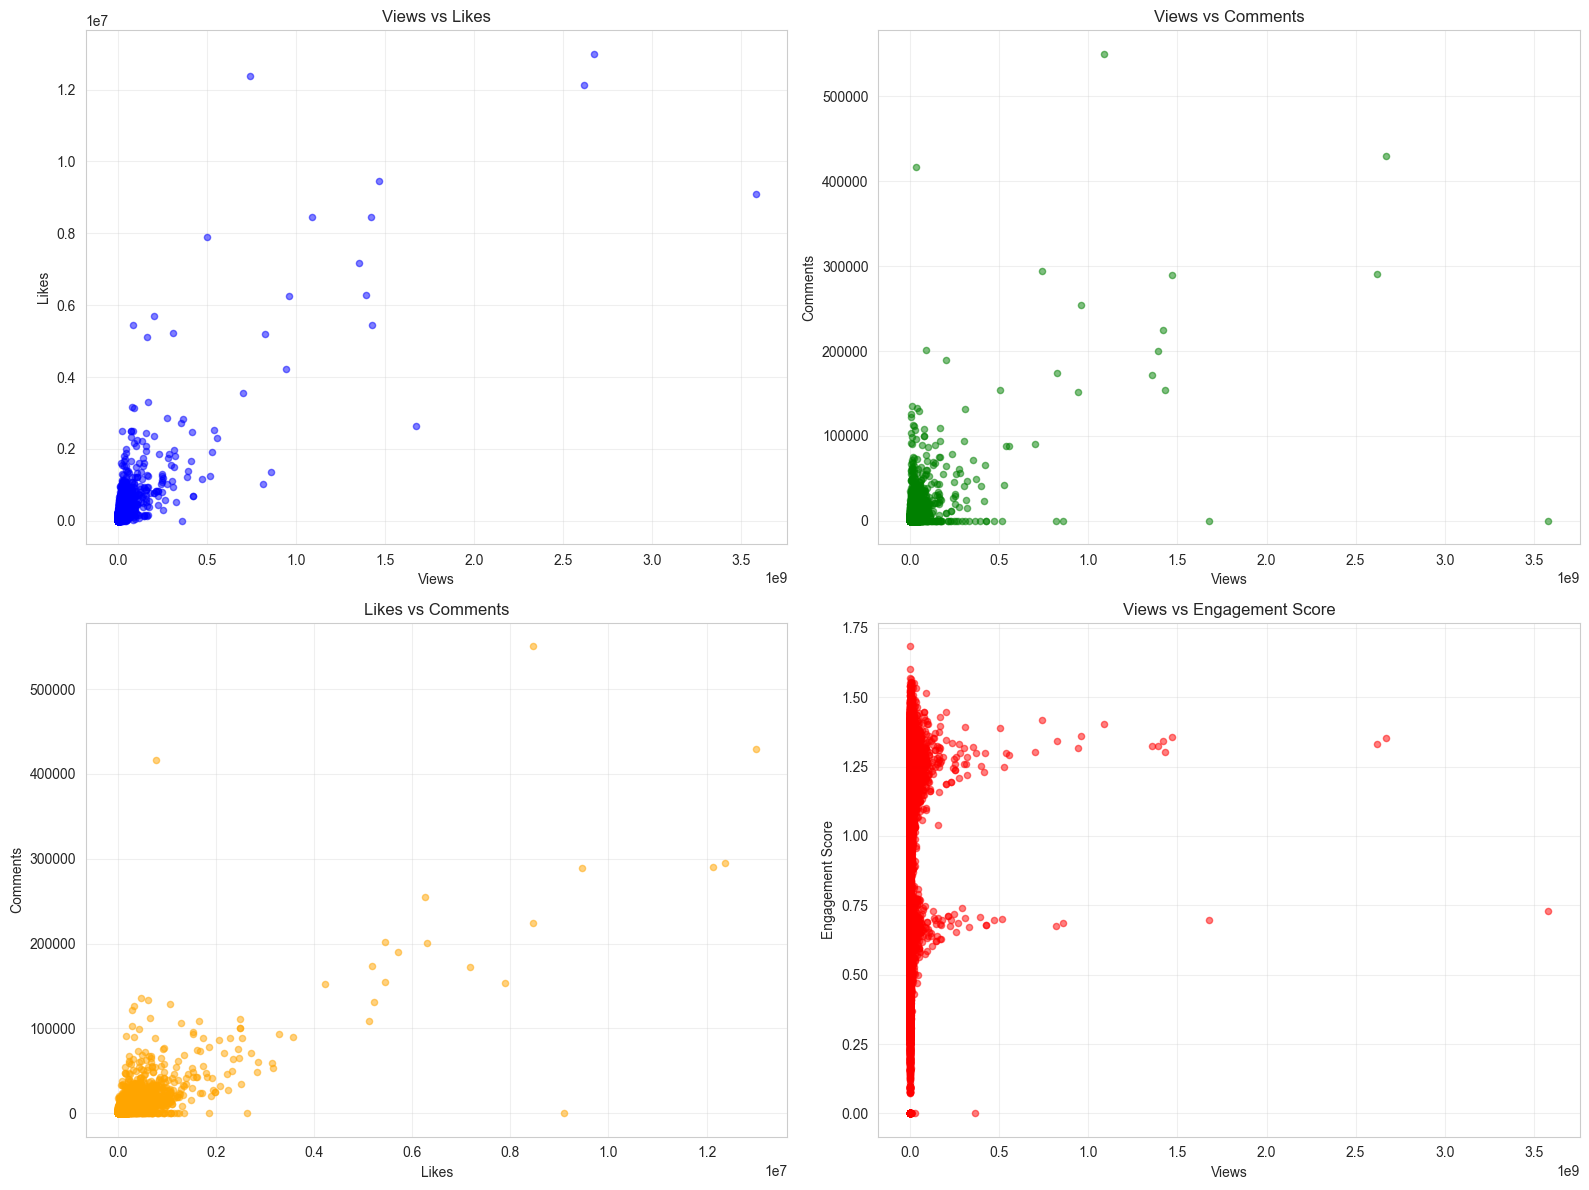

In [34]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Views vs Likes
axes[0, 0].scatter(df['views'], df['likes'], alpha=0.5, color='blue', s=20)
axes[0, 0].set_xlabel('Views')
axes[0, 0].set_ylabel('Likes')
axes[0, 0].set_title('Views vs Likes')
axes[0, 0].grid(alpha=0.3)

# Views vs Comments
axes[0, 1].scatter(df['views'], df['comments'], alpha=0.5, color='green', s=20)
axes[0, 1].set_xlabel('Views')
axes[0, 1].set_ylabel('Comments')
axes[0, 1].set_title('Views vs Comments')
axes[0, 1].grid(alpha=0.3)

# Likes vs Comments
axes[1, 0].scatter(df['likes'], df['comments'], alpha=0.5, color='orange', s=20)
axes[1, 0].set_xlabel('Likes')
axes[1, 0].set_ylabel('Comments')
axes[1, 0].set_title('Likes vs Comments')
axes[1, 0].grid(alpha=0.3)

# Views vs Engagement Score
axes[1, 1].scatter(df['views'], df['engagement_score'], alpha=0.5, color='red', s=20)
axes[1, 1].set_xlabel('Views')
axes[1, 1].set_ylabel('Engagement Score')
axes[1, 1].set_title('Views vs Engagement Score')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Outlier Detection

In [35]:
# Detect outliers using IQR method
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier_Count': outlier_count,
        'Percentage': outlier_pct
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
print('Outlier Summary:')
print(outlier_df)

Outlier Summary:
            Feature  Outlier_Count  Percentage
2  subscriber_count           7758   15.466507
5             views           7650   15.251196
6             likes           7088   14.130781
7          comments           6724   13.405104
3      total_videos           5672   11.307815
1  duration_seconds           4750    9.469697
0       category_id           3837    7.649522
8  engagement_score           2277    4.539474
4  channel_age_days              0    0.000000


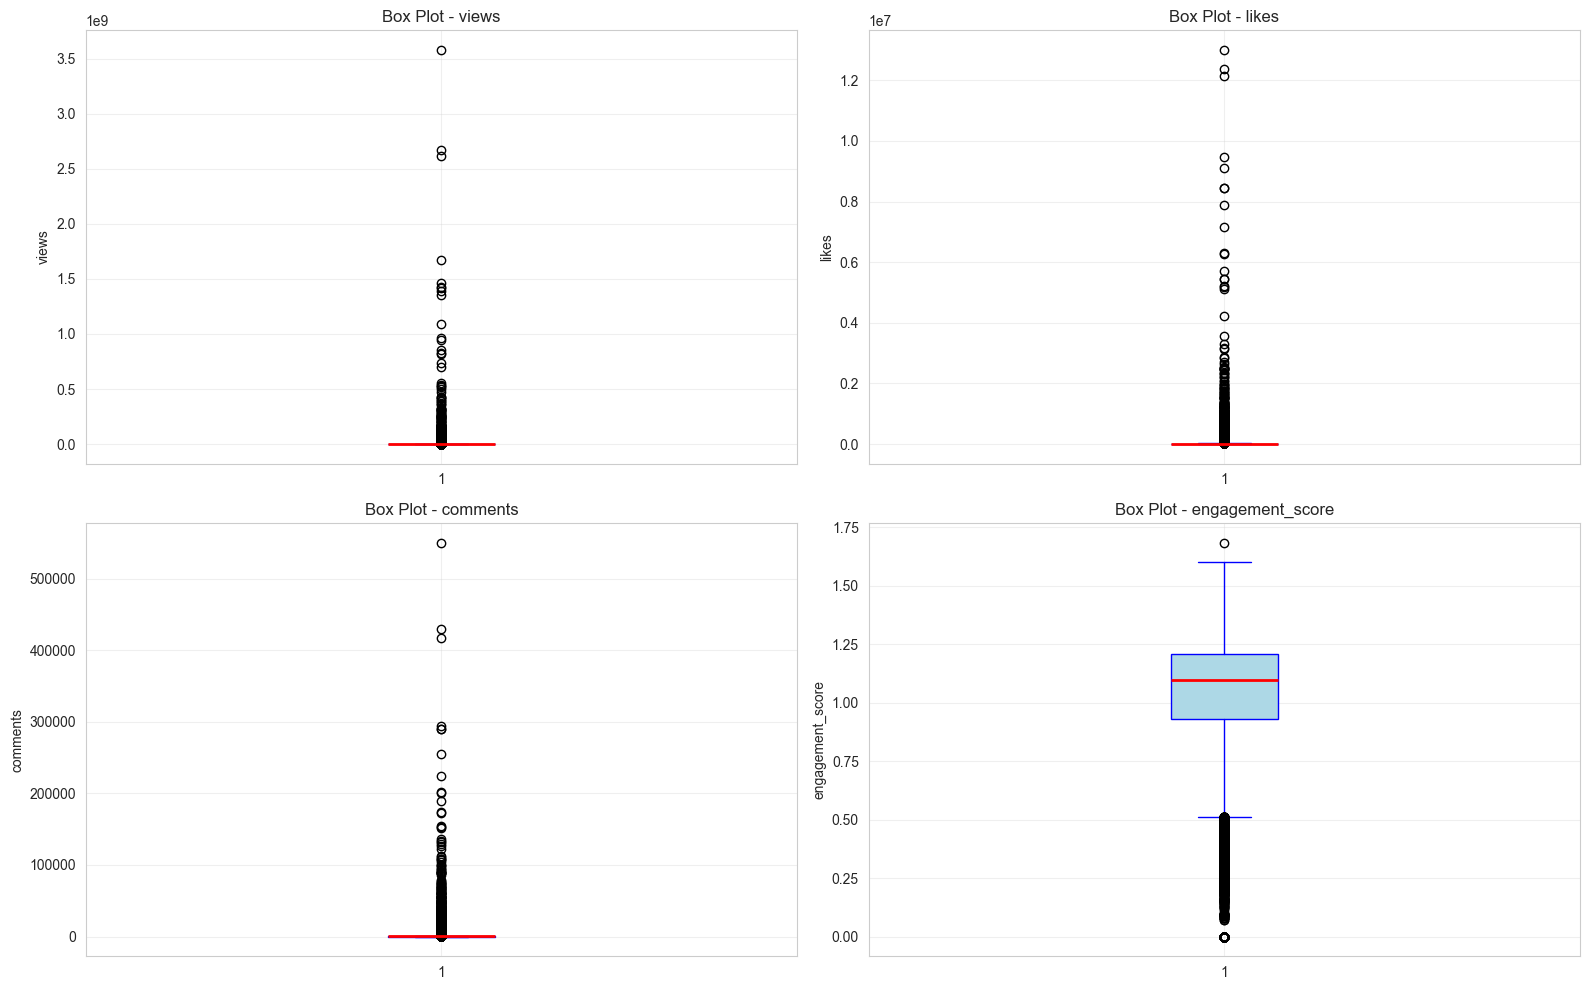

In [36]:
# Box plots for outlier visualization
key_numeric = ['views', 'likes', 'comments', 'engagement_score']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_numeric):
    if col in df.columns:
        axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='blue'),
                         capprops=dict(color='blue'))
        axes[idx].set_ylabel(col)
        axes[idx].set_title(f'Box Plot - {col}')
        axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()